Dataset characteristics
=========================================	
day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from datetime import datetime

import statsmodels.api as sm

In [65]:
bikes = pd.read_csv('day.csv')
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [66]:
bikes.shape

(730, 16)

In [67]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [68]:
bikes.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

- There are no missing values in the dataset

In [69]:
bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


- For the continuous numerical variables, the mean and median(50%) are similar, so it means that there 
    are no significant outliers in the data

In [70]:
# Since weekday column is unclear on which day is encoded as what, lets verify using dteday column

list(zip(pd.to_datetime(bikes['dteday'], format="%d-%m-%Y").dt.day_name(), bikes.weekday))

# we see that in the dataset, 1=Monday, 0=Sunday

[('Monday', 1),
 ('Tuesday', 2),
 ('Wednesday', 3),
 ('Thursday', 4),
 ('Friday', 5),
 ('Saturday', 6),
 ('Sunday', 0),
 ('Monday', 1),
 ('Tuesday', 2),
 ('Wednesday', 3),
 ('Thursday', 4),
 ('Friday', 5),
 ('Saturday', 6),
 ('Sunday', 0),
 ('Monday', 1),
 ('Tuesday', 2),
 ('Wednesday', 3),
 ('Thursday', 4),
 ('Friday', 5),
 ('Saturday', 6),
 ('Sunday', 0),
 ('Monday', 1),
 ('Tuesday', 2),
 ('Wednesday', 3),
 ('Thursday', 4),
 ('Friday', 5),
 ('Saturday', 6),
 ('Sunday', 0),
 ('Monday', 1),
 ('Tuesday', 2),
 ('Wednesday', 3),
 ('Thursday', 4),
 ('Friday', 5),
 ('Saturday', 6),
 ('Sunday', 0),
 ('Monday', 1),
 ('Tuesday', 2),
 ('Wednesday', 3),
 ('Thursday', 4),
 ('Friday', 5),
 ('Saturday', 6),
 ('Sunday', 0),
 ('Monday', 1),
 ('Tuesday', 2),
 ('Wednesday', 3),
 ('Thursday', 4),
 ('Friday', 5),
 ('Saturday', 6),
 ('Sunday', 0),
 ('Monday', 1),
 ('Tuesday', 2),
 ('Wednesday', 3),
 ('Thursday', 4),
 ('Friday', 5),
 ('Saturday', 6),
 ('Sunday', 0),
 ('Monday', 1),
 ('Tuesday', 2),
 ('Wedn

## Exploratory Data Analysis

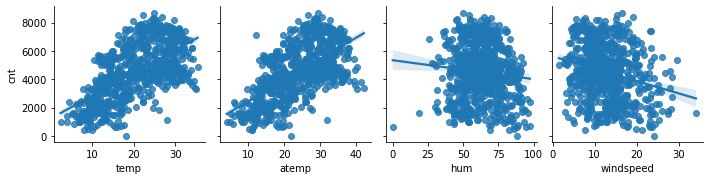

In [71]:
# Analysing the numerical columns

sns.pairplot(data=bikes, x_vars=['temp','atemp','hum','windspeed'], y_vars=['cnt'], kind='reg')
plt.show()

- Temp and atemp are highly positively correlated to cnt
- Humidity and Windspeed are negatively correlated to cnt

Text(0.5, 1.0, 'Variation of rentals with Temperature')

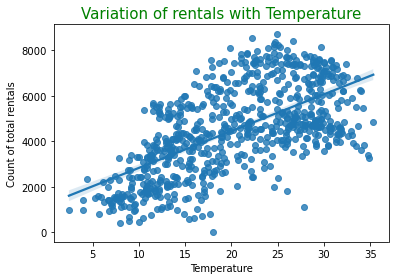

In [72]:
sns.regplot(x=bikes.temp, y=bikes.cnt)
plt.xlabel('Temperature')
plt.ylabel('Count of total rentals')
plt.title('Variation of rentals with Temperature', color='g', fontsize=15)

- Highest cnt of rentals when temperature is ambient i.e temp between 20 and 30

Text(0.5, 1.0, 'Variation of rentals with Humidity')

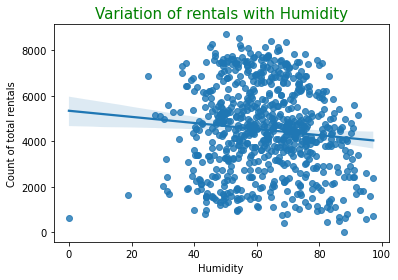

In [73]:
sns.regplot(x=bikes.hum, y=bikes.cnt)
plt.xlabel('Humidity')
plt.ylabel('Count of total rentals')
plt.title('Variation of rentals with Humidity', color='g', fontsize=15)

- Rentals are mostly on days with Humidity between 40 to 80
- Low density of rentals on less humid or Dry days.
- Rentals drop as humidity increases above 80, which are probably the days with rains.

Text(0.5, 1.0, 'Variation of rentals with windspeed')

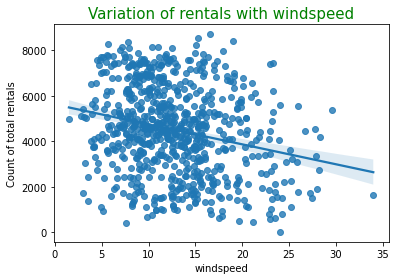

In [74]:
sns.regplot(x=bikes.windspeed, y=bikes.cnt)
plt.xlabel('windspeed')
plt.ylabel('Count of total rentals')
plt.title('Variation of rentals with windspeed', color='g', fontsize=15)

- Rentals high on days with low windspeed and vice-versa. Windspeed is inversely proportional to cnt
- Low density of rentals on days with high windspeeds

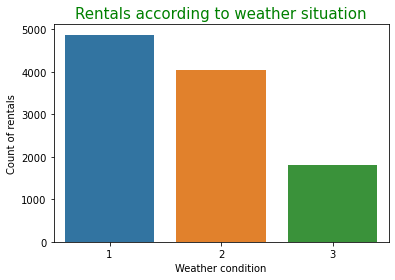

In [75]:
avg_cnt = bikes.groupby(by='weathersit')['cnt'].mean()

sns.barplot(x=avg_cnt.index, y=avg_cnt.values)
plt.xlabel('Weather condition')
plt.ylabel('Count of rentals')
plt.title('Rentals according to weather situation', color='g', fontsize=15)
plt.show()

- We can see that most number of rentals are on days with clear skies, partly cloudy or misty skies
- Very few rentals on days with light rains/snowy days
- No rentals on days with Heavy rains

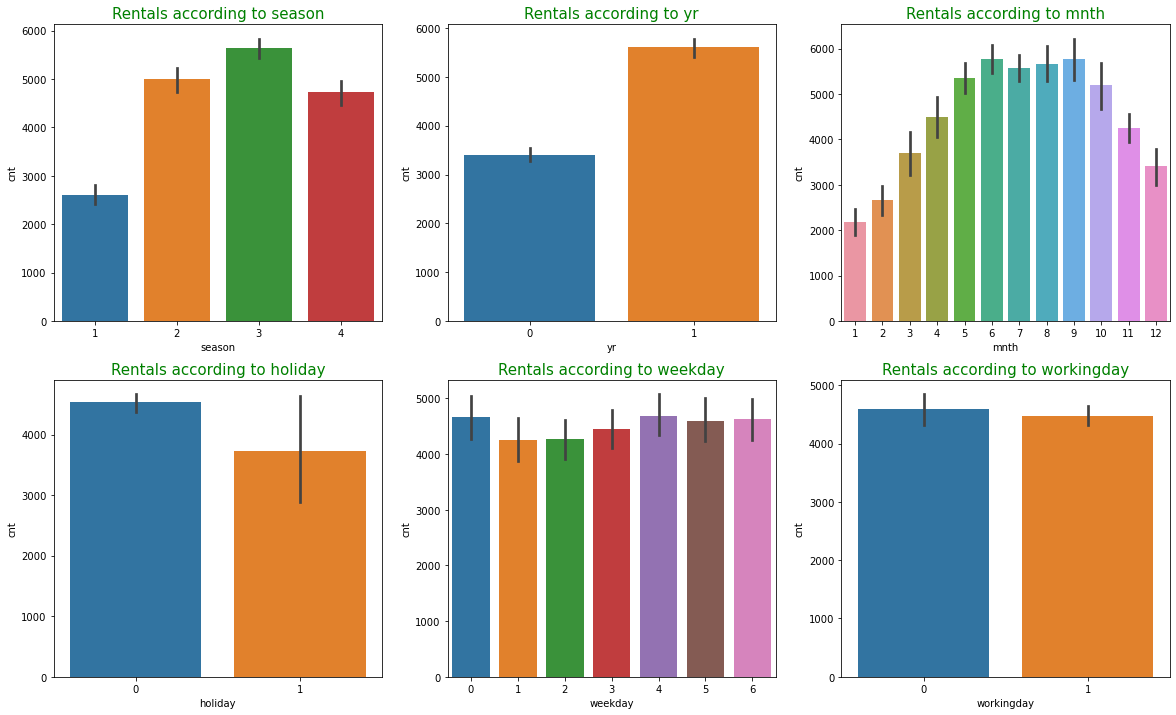

In [76]:
cols = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday']

plt.figure(figsize=[20,12])
           
for i,j in enumerate(cols):
    plt.subplot(2,3,i+1)
    sns.barplot(x=j, y='cnt', data=bikes)
    plt.ylabel('cnt')
    plt.title(f'Rentals according to {j}', color='g', fontsize=15)

- Highest avg rentals in Fall season and lowest in Spring
- Avg Rentals are more in 2019 than 2018
- Avg Rentals are high in June-Sept, lowest in Jan-feb
- Avg Rentals are high on Non holidays
- Avg rentals are high during weekends and Thursday, Friday

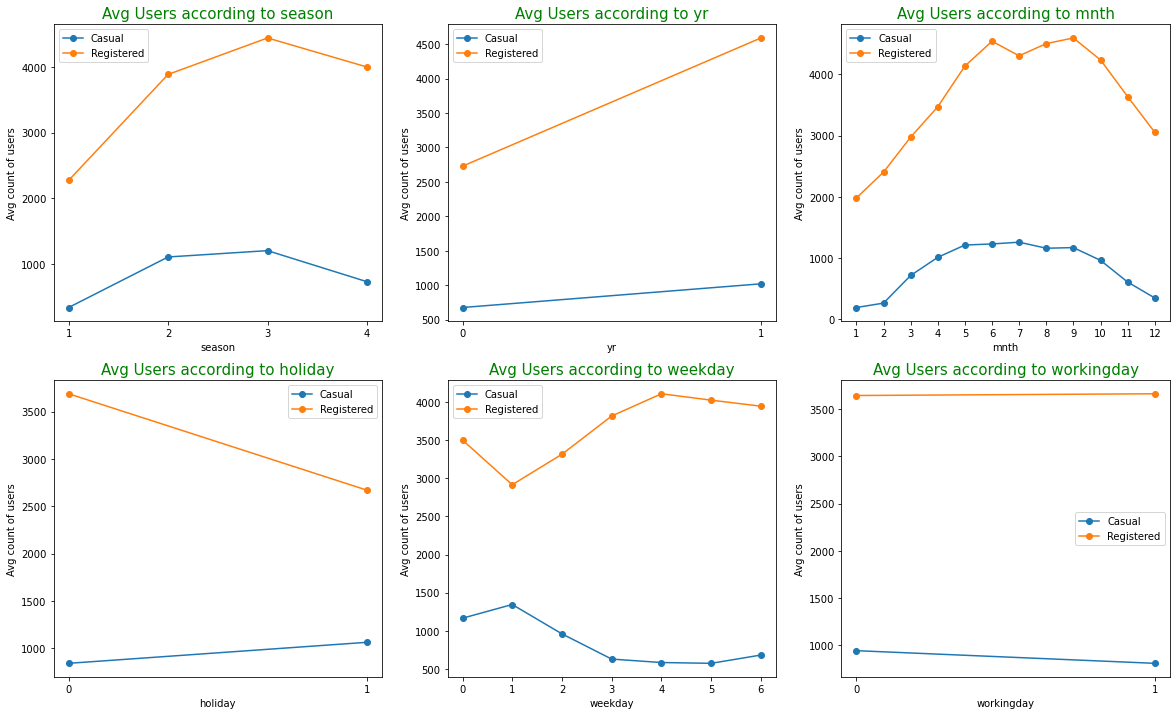

In [77]:
cols = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday']

plt.figure(figsize=[20,12])
           
for i,j in enumerate(cols):
    plt.subplot(2,3,i+1)
    temp1 = bikes.groupby(by=bikes[j])['casual'].mean()
    temp2 = bikes.groupby(by=bikes[j])['registered'].mean()
    x = temp1.index
    y1 = temp1.values
    y2 = temp2.values
    plt.plot(x, y1,'-o', label='Casual')
    plt.plot(x, y2, '-o', label='Registered')
    plt.xticks(ticks=x)
    plt.legend()
    plt.xlabel(j)
    plt.ylabel('Avg count of users')
    plt.title(f'Avg Users according to {j}', color='g', fontsize=15)

- No. of registered users are higher than casual users on average
- On Holidays, number of casual riders increases and no. of registered users decreases. This means that many people take rides for leisure on holidays and registered users generally use more during non holidays probably for office commute.
- Lowest no of registered users and highest no of casual users on tuesdays

Text(0.5, 1.0, 'Correlation map')

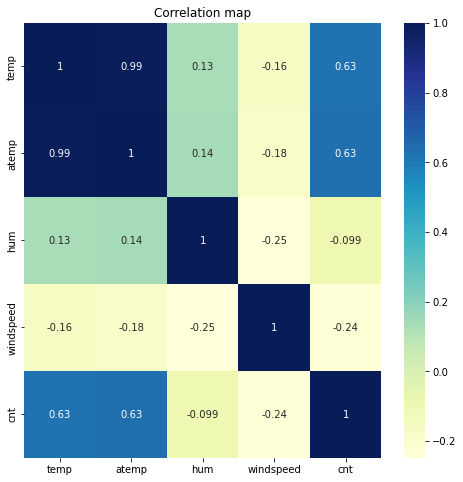

In [78]:
# check correlation

plt.figure(figsize=[8,8])
sns.heatmap(bikes[['temp','atemp','hum','windspeed','cnt']].corr(), cmap='YlGnBu', annot=True)
plt.title('Correlation map')

- cnt is highly correlated (positive) with temp
- cnt is negatively correlated with windspeed and humidity
- cnt is not significantly correlated with humidity

- Temp is highly correlated to atemp, so we can drop atemp

## Data Preparation

In [79]:
# Mapping the columns for easier understanding

bikes2 = bikes.copy()

bikes2.weathersit = bikes2.weathersit.map({1:'Clear',2:'Misty',3:'Light_rain',4:'Heavy_rain'})

bikes2.season = bikes2.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

bikes2.mnth = bikes2.mnth.map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul',
                             8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov',12:'Dec'})

bikes2.weekday = bikes2.weekday.map({0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'})

In [80]:
# Creating dummies for categorical variables

cols = ['weathersit', 'season', 'mnth', 'weekday']

def concat_df(df, col):
    df = pd.concat([df, pd.get_dummies(df[col], drop_first=True)], axis=1)
    df.drop(columns=col, inplace=True)
    return df

for i in cols:
    bikes2 = concat_df(bikes2, i)

In [81]:
bikes2.columns

Index(['instant', 'dteday', 'yr', 'holiday', 'workingday', 'temp', 'atemp',
       'hum', 'windspeed', 'casual', 'registered', 'cnt', 'Light_rain',
       'Misty', 'spring', 'summer', 'winter', 'Aug', 'Dec', 'Feb', 'Jan',
       'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Mon', 'Sat', 'Sun',
       'Thu', 'Tue', 'Wed'],
      dtype='object')

In [82]:
# Dropping unnecessary columns for prediction : instant
# dropping dteday as month, year, weekday are also extracted from it
# Dropping atemp column as it is highly correlated to temp column
# dropping casual and registered as they are subgroups of target variable cnt so they are highly correlated to cnt

bikes2.drop(columns=['instant','dteday','atemp','casual','registered'], inplace=True)
bikes2.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Light_rain,Misty,spring,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
0,0,0,1,14.110847,80.5833,10.749882,985,0,1,1,...,0,0,0,0,1,0,0,0,0,0
1,0,0,1,14.902598,69.6087,16.652113,801,0,1,1,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [83]:
bikes2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   hum         730 non-null    float64
 5   windspeed   730 non-null    float64
 6   cnt         730 non-null    int64  
 7   Light_rain  730 non-null    uint8  
 8   Misty       730 non-null    uint8  
 9   spring      730 non-null    uint8  
 10  summer      730 non-null    uint8  
 11  winter      730 non-null    uint8  
 12  Aug         730 non-null    uint8  
 13  Dec         730 non-null    uint8  
 14  Feb         730 non-null    uint8  
 15  Jan         730 non-null    uint8  
 16  Jul         730 non-null    uint8  
 17  Jun         730 non-null    uint8  
 18  Mar         730 non-null    uint8  
 19  May         730 non-null    u

## Splitting the Data into Training and Testing Sets

In [84]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(bikes2, train_size=0.7, random_state=42)
df_train.shape, df_test.shape

((510, 29), (220, 29))

In [85]:
# Rescaling features

cols_toscale = ['temp', 'hum', 'windspeed','cnt']
scaler = MinMaxScaler()
df_train[cols_toscale] = scaler.fit_transform(df_train[cols_toscale])
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Light_rain,Misty,spring,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
645,1,1,0,0.403972,0.731215,0.419004,0.609320,0,1,0,...,0,0,1,0,0,0,0,0,1,0
163,0,0,1,0.717562,0.509660,0.708724,0.554026,0,0,0,...,0,0,0,0,0,0,0,0,0,1
360,0,0,1,0.331287,0.785745,0.415925,0.088253,0,1,1,...,0,0,0,0,0,0,0,1,0,0
640,1,0,1,0.745598,0.817947,0.110593,0.862127,0,1,0,...,0,0,1,0,0,0,0,1,0,0
625,1,0,1,0.703024,0.899098,0.839562,0.439696,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [86]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 645 to 102
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          510 non-null    int64  
 1   holiday     510 non-null    int64  
 2   workingday  510 non-null    int64  
 3   temp        510 non-null    float64
 4   hum         510 non-null    float64
 5   windspeed   510 non-null    float64
 6   cnt         510 non-null    float64
 7   Light_rain  510 non-null    uint8  
 8   Misty       510 non-null    uint8  
 9   spring      510 non-null    uint8  
 10  summer      510 non-null    uint8  
 11  winter      510 non-null    uint8  
 12  Aug         510 non-null    uint8  
 13  Dec         510 non-null    uint8  
 14  Feb         510 non-null    uint8  
 15  Jan         510 non-null    uint8  
 16  Jul         510 non-null    uint8  
 17  Jun         510 non-null    uint8  
 18  Mar         510 non-null    uint8  
 19  May         510 non-null   

In [87]:
# Diving into X_train and y_train

y_train = df_train.pop('cnt')
X_train = df_train


## Model building

In [88]:
from sklearn.feature_selection import RFE

In [89]:
# Method to compute regression using statsmodels

def statsmodel_summary(X):
    X = sm.add_constant(X)
    lm = sm.OLS(y_train, X).fit() 
    return lm


In [90]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Method to compute VIF

def findVIF(X_train):
    vif = pd.DataFrame()
    X = X_train
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif


In [91]:
# Running RFE with the output number of the variable equal to 15

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15)            
rfe = rfe.fit(X_train, y_train)

In [92]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 10),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Light_rain', True, 1),
 ('Misty', True, 1),
 ('spring', True, 1),
 ('summer', False, 6),
 ('winter', True, 1),
 ('Aug', False, 8),
 ('Dec', True, 1),
 ('Feb', False, 7),
 ('Jan', False, 11),
 ('Jul', True, 1),
 ('Jun', False, 14),
 ('Mar', True, 1),
 ('May', True, 1),
 ('Nov', True, 1),
 ('Oct', False, 2),
 ('Sep', True, 1),
 ('Mon', False, 3),
 ('Sat', False, 12),
 ('Sun', False, 9),
 ('Thu', False, 13),
 ('Tue', False, 5),
 ('Wed', False, 4)]

In [93]:
# Finding columns found relevant by RFE

col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'Light_rain', 'Misty',
       'spring', 'winter', 'Dec', 'Jul', 'Mar', 'May', 'Nov', 'Sep'],
      dtype='object')

In [94]:
# Non relevant columns by RFE

X_train.columns[~rfe.support_]

Index(['workingday', 'summer', 'Aug', 'Feb', 'Jan', 'Jun', 'Oct', 'Mon', 'Sat',
       'Sun', 'Thu', 'Tue', 'Wed'],
      dtype='object')

In [95]:
# Creating X_train_rfe with relevant columns

X_train_rfe = X_train[col]

In [96]:
# using statsmodels to see statistics of the model

model1 = statsmodel_summary(X_train_rfe)
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     174.7
Date:                Tue, 25 Apr 2023   Prob (F-statistic):          1.98e-186
Time:                        10:21:50   Log-Likelihood:                 486.72
No. Observations:                 510   AIC:                            -941.4
Df Residuals:                     494   BIC:                            -873.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3388      0.036      9.314      0.0

/Users/SH20247538/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [97]:
findVIF(X_train_rfe)

,Features,VIF
3,hum,24.82
2,temp,16.94
4,windspeed,5.08
7,spring,2.89
8,winter,2.89
6,Misty,2.24
0,yr,2.09
13,Nov,1.82
10,Jul,1.57
9,Dec,1.38


- We can see that all p-values are in range (below 0.05) 
- The VIF of 'hum' is very high, meaning that the variance in 'hum' is already explained by other predictors, so lets remove that first

In [98]:
# Drop hum
X_train_rfe = X_train_rfe.drop(['hum'], axis=1)

# Compute statsmodels summary again
model2 = statsmodel_summary(X_train_rfe)
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     179.9
Date:                Tue, 25 Apr 2023   Prob (F-statistic):          8.66e-184
Time:                        10:21:50   Log-Likelihood:                 477.70
No. Observations:                 510   AIC:                            -925.4
Df Residuals:                     495   BIC:                            -861.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2418      0.029      8.438      0.0

/Users/SH20247538/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [99]:
findVIF(X_train_rfe)

,Features,VIF
2,temp,5.86
3,windspeed,5.04
7,winter,2.45
0,yr,2.09
6,spring,1.86
12,Nov,1.78
5,Misty,1.58
9,Jul,1.54
8,Dec,1.33
11,May,1.31


- No drastic drop in R-squared, so removal of Humidity variable was the right decision
- VIF of temp is still a bit high
- But since we have seen in EDA that temp has high correlation with cnt, and it's pvalue is also zero, so we won't remove it  
- 'May' has high pvalue , so lets remove it and see if it reduces VIF of temp

In [100]:
# Drop May
X_train_rfe = X_train_rfe.drop(['May'], axis=1)

# Compute statsmodels summary again
model3 = statsmodel_summary(X_train_rfe)
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     192.6
Date:                Tue, 25 Apr 2023   Prob (F-statistic):          2.99e-184
Time:                        10:21:50   Log-Likelihood:                 476.05
No. Observations:                 510   AIC:                            -924.1
Df Residuals:                     496   BIC:                            -864.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2503      0.028      8.838      0.0

/Users/SH20247538/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [101]:
findVIF(X_train_rfe)

,Features,VIF
2,temp,5.43
3,windspeed,5.04
7,winter,2.36
0,yr,2.08
6,spring,1.82
11,Nov,1.78
5,Misty,1.57
9,Jul,1.44
8,Dec,1.33
12,Sep,1.24


- No drastic drop in R-score
- All variables have low p-values, so all of them are significant.
- VIF of temp is reduced by dropping 'May' but it is still high.
- p-value of holiday is large compared to other predictors, so lets remove this variable

In [102]:
# Drop holiday
X_train_rfe = X_train_rfe.drop(['holiday'], axis=1)

# Compute statsmodels summary again
model4 = statsmodel_summary(X_train_rfe)
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     205.1
Date:                Tue, 25 Apr 2023   Prob (F-statistic):          1.04e-183
Time:                        10:21:50   Log-Likelihood:                 472.00
No. Observations:                 510   AIC:                            -918.0
Df Residuals:                     497   BIC:                            -863.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2473      0.029      8.677      0.0

/Users/SH20247538/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [103]:
findVIF(X_train_rfe)

,Features,VIF
1,temp,5.42
2,windspeed,5.04
6,winter,2.36
0,yr,2.08
5,spring,1.80
10,Nov,1.78
4,Misty,1.57
8,Jul,1.44
7,Dec,1.33
11,Sep,1.24


- No drastic drop in R-score
- VIF not much affected by removing holiday
- p value of Sep is greater than others, so lets drop that

In [104]:
# Drop Sep
X_train_rfe = X_train_rfe.drop(['Sep'], axis=1)

# Compute statsmodels summary again
model5 = statsmodel_summary(X_train_rfe)
print(model5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     219.5
Date:                Tue, 25 Apr 2023   Prob (F-statistic):          5.40e-183
Time:                        10:21:50   Log-Likelihood:                 467.50
No. Observations:                 510   AIC:                            -911.0
Df Residuals:                     498   BIC:                            -860.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2461      0.029      8.569      0.0

/Users/SH20247538/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [105]:
findVIF(X_train_rfe)

,Features,VIF
1,temp,5.00
2,windspeed,5.00
6,winter,2.35
0,yr,2.08
5,spring,1.80
10,Nov,1.76
4,Misty,1.57
8,Jul,1.38
7,Dec,1.32
9,Mar,1.16


- Now, the VIF values are acceptable
- p values are very low for all predictors, so all of them are significant
- Probability of F-statistic is very low, which means the overall model is significant

#### So, model5 is our final model


## Residual Analysis on training set

In [106]:
from sklearn.metrics import mean_squared_error, r2_score

# add constant to apply OLS 
X = sm.add_constant(X_train_rfe)

# predict on train set
y_train_pred = model5.predict(X)


/Users/SH20247538/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Text(0.5, 1.0, 'Distribution of Error terms on train set')

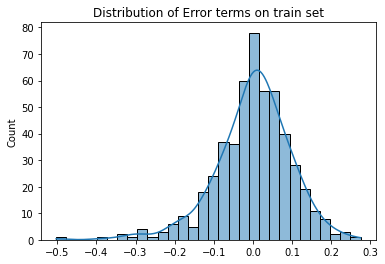

In [107]:
# Analysing error terms or residuals
errors_train = y_train - y_train_pred

# plotting error terms
sns.histplot(errors_train, bins=30, kde=True)
plt.title('Distribution of Error terms on train set')

- Error terms are normally distributed with mean = 0

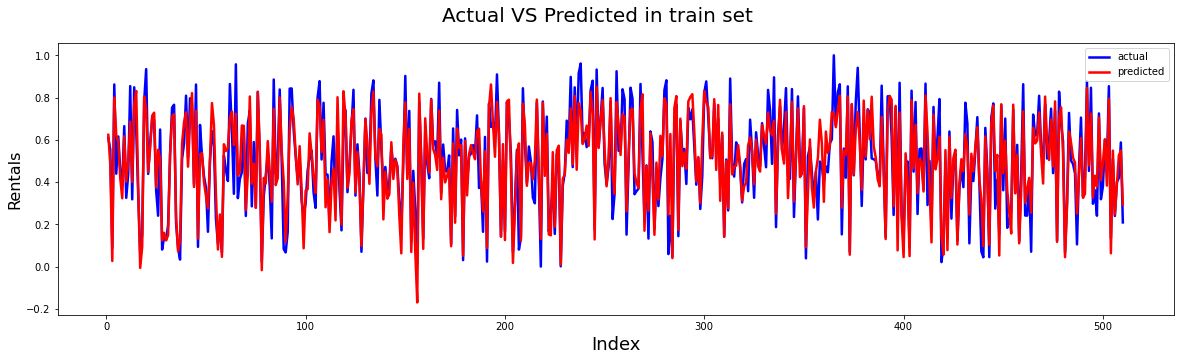

In [108]:
#Actual vs Predicted

c = [i for i in range(1, y_train.shape[0]+1)]
fig = plt.figure(figsize=[20,5])
plt.plot(c, y_train, color="blue", linewidth=2.5, linestyle="-", label='actual')
plt.plot(c, y_train_pred , color="red",  linewidth=2.5, linestyle="-", label='predicted')
fig.suptitle('Actual VS Predicted in train set', fontsize=20)             
plt.xlabel('Index', fontsize=18)                             
plt.ylabel('Rentals', fontsize=16)    
plt.legend()

Text(0, 0.5, 'actual-predicted')

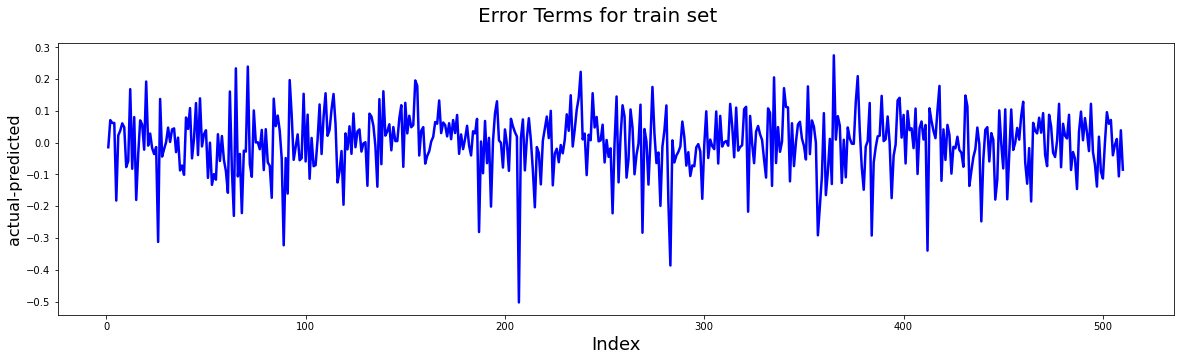

In [109]:
# Analysing the plot of residuals

c = [i for i in range(1,y_train.shape[0]+1)]
fig = plt.figure(figsize=[20,5])
plt.plot(c, errors_train, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms for train set', fontsize=20)              
plt.xlabel('Index', fontsize=18)                      
plt.ylabel('actual-predicted', fontsize=16)             

- Error terms are randomly distributed and no patterns are observed, meaning that the model explains everything possible

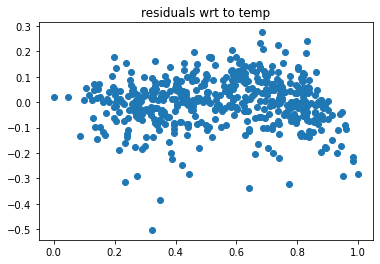

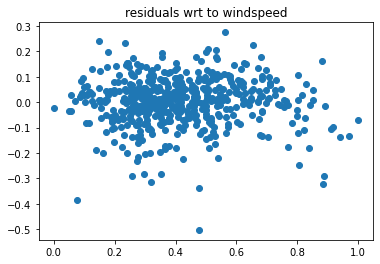

In [110]:
# Homoscedasticity check

for i in X_train_rfe.columns:
    if len(X_train_rfe[i].unique()) > 2:
        plt.scatter(X_train_rfe[i], errors_train)
        plt.title(f'residuals wrt to {i}')
        plt.show()

- The error terms have constant variance wrt independent variables. 

## Predictions on test set 

In [111]:
# Preparing the test set

# Rescaling test set
cols_toscale = ['temp', 'hum', 'windspeed','cnt']

# we only transform test set based on the parameters learnt from fitting the scaler on train set
df_test[cols_toscale] = scaler.transform(df_test[cols_toscale])
df_test.head()


,yr,holiday,workingday,temp,hum,windspeed,cnt,Light_rain,Misty,spring,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
468,1,0,0,0.543115,0.518248,0.422104,0.848606,0,0,0,...,0,0,0,0,0,0,1,0,0,0
148,0,0,1,0.758058,0.843709,0.479765,0.526017,0,0,0,...,1,0,0,0,0,0,0,0,1,0
302,0,0,1,0.324018,0.642765,0.386287,0.350115,0,0,0,...,0,0,1,0,0,0,0,0,1,0
355,0,0,0,0.453814,0.780592,0.062325,0.318363,0,1,1,...,0,0,0,0,0,1,0,0,0,0
515,1,0,1,0.773634,0.507943,0.433030,0.833877,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [112]:
# Dividing into X_test and y_test

y_test = df_test.pop('cnt')
X_test = df_test

In [113]:
# extracting only the required columns based on the training features for final model

cols_req = X_train_rfe.columns

X_test = X_test[cols_req]
X_test.columns

Index(['yr', 'temp', 'windspeed', 'Light_rain', 'Misty', 'spring', 'winter',
       'Dec', 'Jul', 'Mar', 'Nov'],
      dtype='object')

In [114]:
# add constant to apply OLS
X = sm.add_constant(X_test)

y_test_pred = model5.predict(X)

/Users/SH20247538/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Text(0.5, 1.0, 'Distribution of Error terms on Test set')

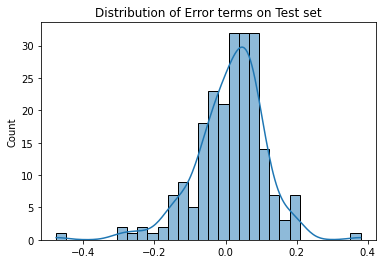

In [115]:
# analysing the residuals

errors_test = y_test - y_test_pred

# plotting error terms(residuals)
sns.histplot(errors_test, bins=30, kde=True)
plt.title('Distribution of Error terms on Test set')


- Residuals are normally distributed with mean approximately equal to 0 for the test set also

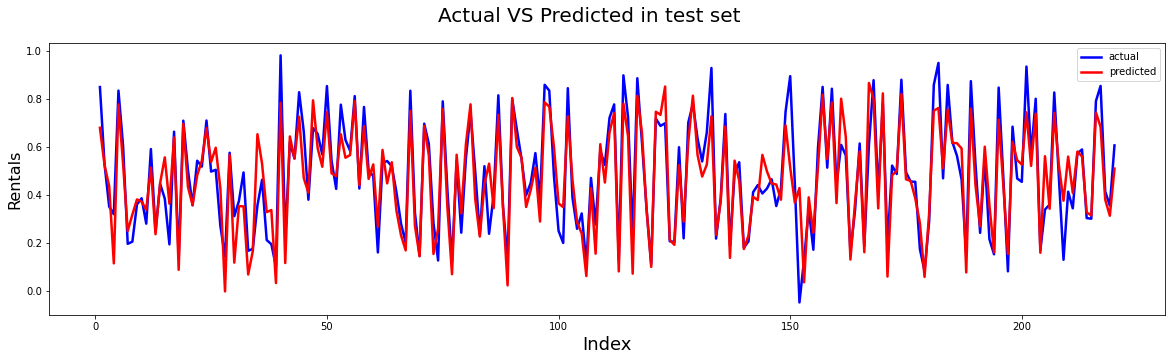

In [116]:
#Actual vs Predicted

c = [i for i in range(1, y_test.shape[0]+1)]
fig = plt.figure(figsize=[20,5])
plt.plot(c, y_test, color="blue", linewidth=2.5, linestyle="-", label='actual')
plt.plot(c, y_test_pred , color="red",  linewidth=2.5, linestyle="-", label='predicted')
fig.suptitle('Actual VS Predicted in test set', fontsize=20)             
plt.xlabel('Index', fontsize=18)                             
plt.ylabel('Rentals', fontsize=16)    
plt.legend()

- We can see that the model is able to predict the target in the test set very well

Text(0, 0.5, 'actual-predicted')

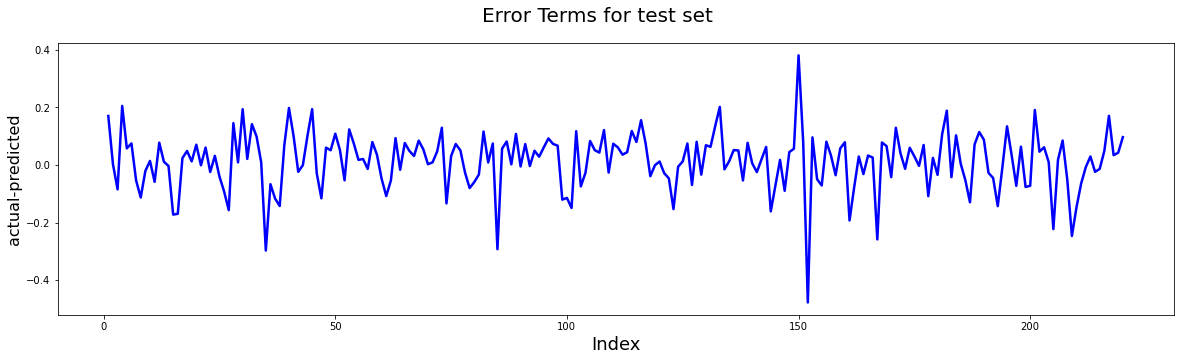

In [117]:
# Analysing the plot of residuals

c = [i for i in range(1,y_test.shape[0]+1)]
fig = plt.figure(figsize=[20,5])
plt.plot(c, errors_test, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms for test set', fontsize=20)              
plt.xlabel('Index', fontsize=18)                      
plt.ylabel('actual-predicted', fontsize=16)    

- errors are totally random means that there are no more patterns that can be explained by the model as it is able to explain everything possible for the data.

## Conclusion

In [118]:
top_features = model5.params
top_features

const         0.246122
yr            0.242079
temp          0.427449
windspeed    -0.098561
Light_rain   -0.268771
Misty        -0.084057
spring       -0.164577
winter        0.088118
Dec          -0.071730
Jul          -0.064982
Mar           0.053683
Nov          -0.091105
dtype: float64

Since all variables are in the same scale, the variables with higher absolute value of coefficients have higher importance.

**The top 3 features are** :
- temp
- Light_rain
- yr

### Train vs Test performance comparison

In [119]:
# evaluate mse and r-squared score on train
mse_tr = mean_squared_error(y_train, y_train_pred)
r_squared_tr = r2_score(y_train, y_train_pred)


# evaluate mse and r-squared score on test
mse_ts = mean_squared_error(y_test, y_test_pred)
r_squared_ts = r2_score(y_test, y_test_pred)


In [120]:
print('Train set MSE: ', mse_tr)
print('Train set R2-score: ', r_squared_tr)

print('Test set MSE: ', mse_ts)
print('Test set R2-score: ', r_squared_ts)

Train set MSE:  0.009361102629794452
Train set R2-score:  0.8290062048400356
Test set MSE:  0.009901207192413526
Test set R2-score:  0.8163354173773183


- The R-squared score on training set and test set are very close to each other
- This indicates that the model is not overfitting on train set and is able to predict fairly well on unseen(test) set.